In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv('/home/atrides/Desktop/R/statistics_with_R/13_GLM4_RepeatedMeasuresDesigns/Data_Files/Attitude.dat', sep='\t')
df.head()

,beerpos,beerneg,beerneut,winepos,wineneg,wineneut,waterpos,waterneg,waterneu,participant
0,1,6,5,38,-5,4,10,-14,-2,P1
1,43,30,8,20,-12,4,9,-10,-13,P2
2,15,15,12,20,-15,6,6,-16,1,P3
3,40,30,19,28,-4,0,20,-10,2,P4
4,8,12,8,11,-2,6,27,5,-5,P5


In [5]:
df_long = pd.melt(df, id_vars=['participant'], value_vars=['beerpos','beerneg','beerneut','winepos','wineneg','wineneut','waterpos','waterneg','waterneu'])

In [6]:
df_long.sort_values(['variable'],inplace=True)
df_long.reset_index(drop=True, inplace=True)

In [7]:
df_long['drink']=df_long['variable'].replace({'beerneg':'beer','beerneut':'beer','beerpos':'beer',
                                    'winepos':'wine','wineneut':'wine','wineneg':'wine',
                                    'waterpos':'water','waterneu':'water','waterneg':'water'})
df_long['atd'] = df_long['variable'].replace({'beerneg':'neg','beerneut':'neut','beerpos':'pos',
                                    'winepos':'pos','wineneut':'neut','wineneg':'neg',
                                    'waterpos':'pos','waterneu':'neut','waterneg':'neg'})
df_long.head()

,participant,variable,value,drink,atd
0,P20,beerneg,-6,beer,neg
1,P2,beerneg,30,beer,neg
2,P3,beerneg,15,beer,neg
3,P4,beerneg,30,beer,neg
4,P5,beerneg,12,beer,neg


In [8]:
df_long.groupby(['drink','atd']).describe()['value']

count   mean        std   min    25%   50%    75%   max
drink atd                                                          
beer  neg    20.0   4.45  17.303711 -19.0  -9.50   0.0  20.25  30.0
      neut   20.0  10.00  10.295630 -10.0   4.00   8.0  16.00  28.0
      pos    20.0  21.05  13.007993   1.0  12.75  18.5  31.00  43.0
water neg    20.0  -9.20   6.802476 -20.0 -14.50 -10.0  -4.00   5.0
      neut   20.0   2.35   6.838552 -13.0   0.00   2.5   8.00  12.0
      pos    20.0  17.40   7.074044   6.0  12.00  17.0  21.00  33.0
wine  neg    20.0 -12.00   6.181466 -23.0 -15.25 -13.5  -6.75  -2.0
      neut   20.0  11.65   6.243101   0.0   6.00  12.5  16.50  21.0
      pos    20.0  25.35   6.737757  11.0  22.25  25.0  29.25  38.0

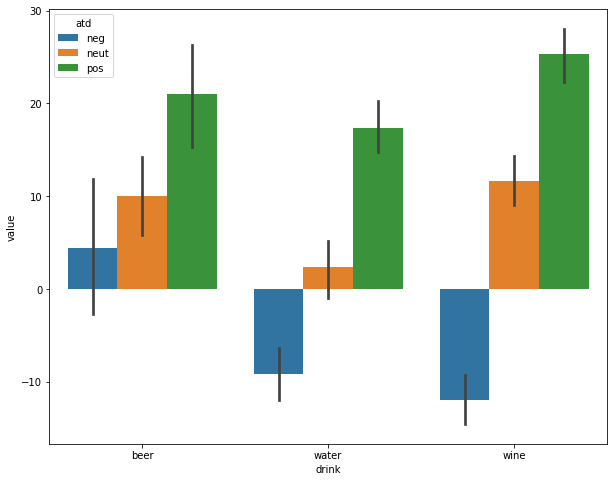

In [9]:
plt.figure(figsize=(10,8))
_ = sns.barplot(x='drink',y='value',data=df_long,hue='atd')

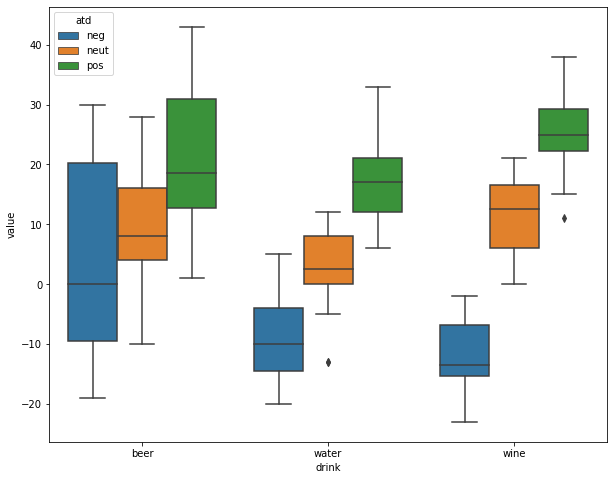

In [10]:
plt.figure(figsize=(10,8))
_ = sns.boxplot(x='drink',y='value',data=df_long,hue='atd')

## Factorial Repeated Measure Anova

In [13]:
aov = pg.rm_anova(dv='value', within=['drink','atd'],

                  subject='participant', data=df_long, detailed=True,

                  effsize="ng2")
aov

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,drink,2092.344444,2,38,1046.172222,5.105981,1.086293e-02,2.976868e-02,0.115869,0.577114
1,atd,21628.677778,2,38,10814.338889,122.564825,2.680197e-17,1.757286e-13,0.575319,0.747441
2,drink * atd,2624.422222,4,76,656.105556,17.154922,4.589040e-10,1.876673e-04,0.141174,0.306821


### Seeing interaction effect

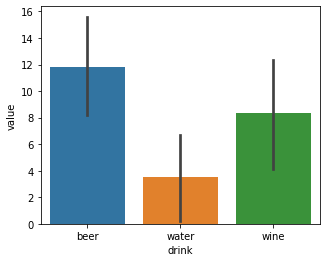

In [14]:
plt.figure(figsize=(5,4))
_ = sns.barplot(x='drink',y='value',data=df_long)

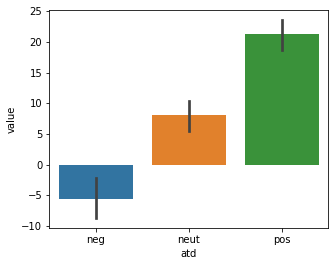

In [15]:
plt.figure(figsize=(5,4))
_ = sns.barplot(x='atd',y='value',data=df_long)

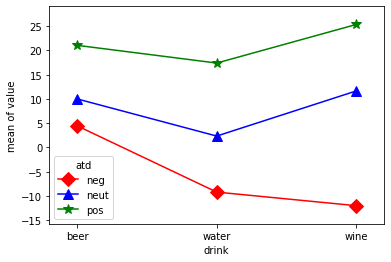

In [16]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df_long.drink, df_long.atd, df_long.value,
             colors=['red','blue','green'], markers=['D','^','*'], ms=10)

## Posthoc Test

In [18]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
multicomp = MultiComparison(df_long['value'], df_long['variable'])   # testfunc

In [19]:
# Bonferroni
com = multicomp.allpairtest(st.ttest_rel, method='bonf')
print(com[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
 group1   group2    stat    pval  pval_corr reject
--------------------------------------------------
 beerneg beerneut  -1.1275 0.2736       1.0  False
 beerneg  beerpos  -3.3887 0.0031     0.111  False
 beerneg waterneg   3.0374 0.0068    0.2439  False
 beerneg waterneu   0.5379 0.5969       1.0  False
 beerneg waterpos  -2.7565 0.0126     0.452  False
 beerneg  wineneg   5.1316 0.0001    0.0021   True
 beerneg wineneut  -1.5276 0.1431       1.0  False
 beerneg  winepos  -4.4134 0.0003    0.0107   True
beerneut  beerpos  -2.4851 0.0224    0.8076  False
beerneut waterneg    8.732    0.0       0.0   True
beerneut waterneu   2.2879 0.0338       1.0  False
beerneut waterpos  -2.5806 0.0183    0.6599  False
beerneut  wineneg    7.461    0.0       0.0   True
beerneut wineneut   -0.675 0.5078       1.0  False
beerneut  winepos    -6.68    0.0    0.0001   True
 beerpos waterneg   8.9369    0.0       

## Robust factorial repeated-measures ANOVA

### no function for now

## Effect Size

### see output from pingouin Factorial Repeated Measure Anova table under ***ng2*** column

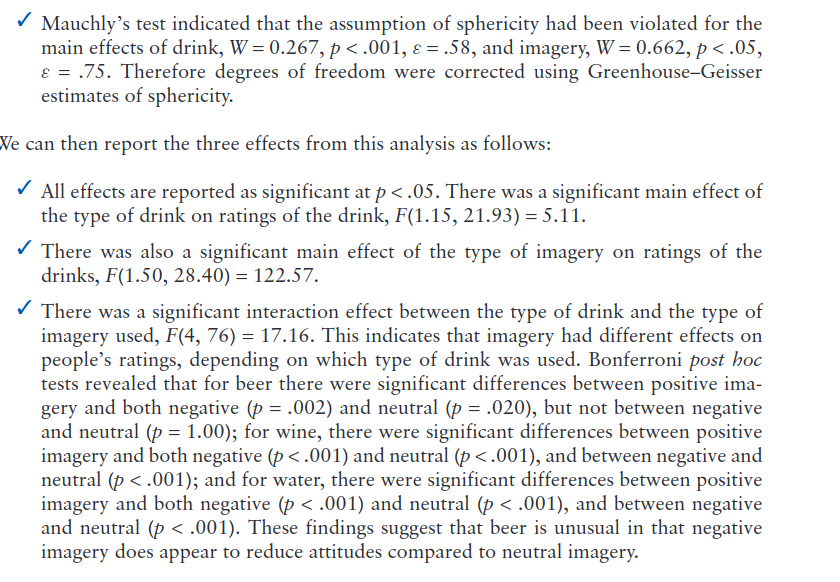

In [20]:
from IPython.display import Image
Image("../../../../../Downloads/13.png")